In [2]:
from turtle import color
import pandas as pd
import matplotlib.pyplot as plt
import datetime


root_dir="./Pandas-Data-Science-Tasks/Sales_Data/"

In [3]:
# 2: what was the best month for sales? How much was earned that month
all_data= pd.read_csv(root_dir+ "all_sales_data.csv")

In [49]:
#remove null value
nan_all_data= all_data[all_data.isna().any(axis=1)]
all_data= all_data.dropna(how='all')

In [5]:
#remove null value
nan_all_data= all_data[all_data.isna().any(axis=1)]
all_data= all_data.dropna(how='all')

In [6]:
# convert numeric data
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


In [7]:
# add column month and Sales
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Sales'] =all_data['Quantity Ordered'] * all_data['Price Each']


In [8]:

#collect data
earn_per_month=all_data.groupby(['Month']).sum()

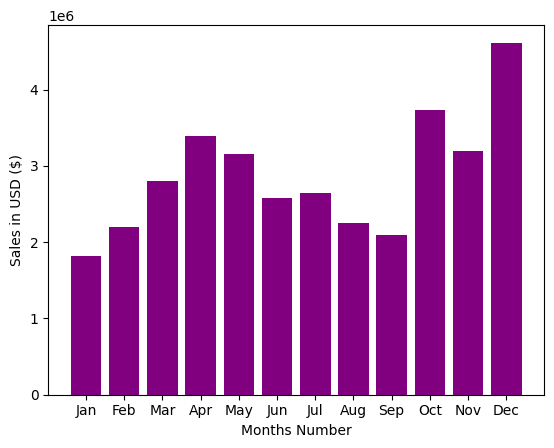

In [9]:

# plot data
months= range(1,13)
months_name= []
for el in months: 
    months_name.append((datetime.datetime.strptime(str(el), "%m")).strftime("%b"))
plt.bar(months_name, earn_per_month['Sales'],color='purple')
plt.ylabel("Sales in USD ($)")
plt.xlabel("Months Number")
plt.show()

# es 2 trovare la migliore città per le vendite

In [10]:
#add city column to data
#address_list= all_data['Purchase Address'].str.split(",",expand=True)
#all_data['City']= address_list[1]
all_data['City']= all_data['Purchase Address'].apply(lambda x : x.split(",")[1])

In [11]:
# group by City
earn_per_city=all_data.groupby(['City']).sum()
print(earn_per_city)

                    Order ID  Quantity Ordered  Price Each       Sales
City                                                                  
 Atlanta        3.423838e+09           16602.0  2779908.20  2795498.58
 Austin         2.280982e+09           11153.0  1809873.61  1819581.75
 Boston         4.598265e+09           22528.0  3637409.77  3661642.01
 Dallas         3.415644e+09           16730.0  2752627.82  2767975.40
 Los Angeles    6.811085e+09           33289.0  5421435.23  5452570.80
 New York City  5.736334e+09           27932.0  4635370.83  4664317.43
 Portland       2.868861e+09           14053.0  2307747.47  2320490.61
 San Francisco  1.030444e+10           50239.0  8211461.74  8262203.91
 Seattle        3.406694e+09           16553.0  2733296.01  2747755.48


In [12]:
print(all_data['City'].drop_duplicates()) # distinct in sql

0             Dallas
2             Boston
3        Los Angeles
6      San Francisco
7            Seattle
8            Atlanta
16     New York City
28          Portland
38            Austin
Name: City, dtype: object


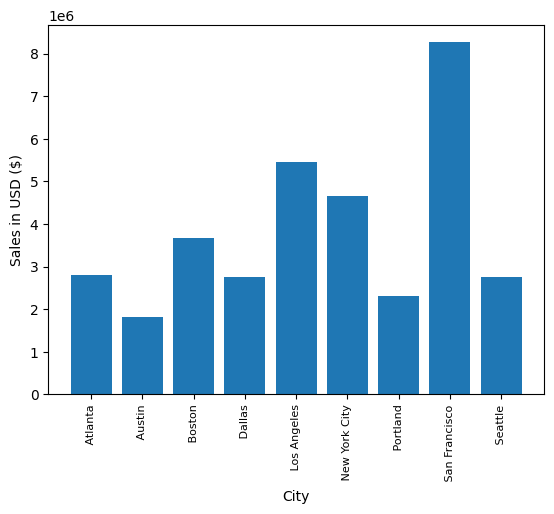

In [13]:
#plot data
#cities=all_data['City'].drop_duplicates().values.tolist()
#cities= all_data['City'].unique() # questo fotte l'ordine dei nomi rispetto ai dati, vedere sotto
cities=[city for city, df in all_data.groupby('City')]
plt.bar(cities, earn_per_city['Sales'])
plt.xticks(cities,rotation='vertical',size=8) # modifica le proprietà delle label dell'asse x
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.show()


# es 3 
What time should we display advertisements to maximize the likelihood of purchases?

idea del tizio: lavorare sull'order date e aggregare i dati in una distribuzione su 24 ore

In [14]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [25]:
all_data['Hour']= all_data['Order Date'].apply(lambda it: it.strftime("%H"))
sales_per_hour=all_data.groupby(['Hour'])['Sales'].size()
print(sales_per_hour)

Hour
00     3910
01     2350
02     1243
03      831
04      854
05     1321
06     2482
07     4011
08     6256
09     8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64


['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


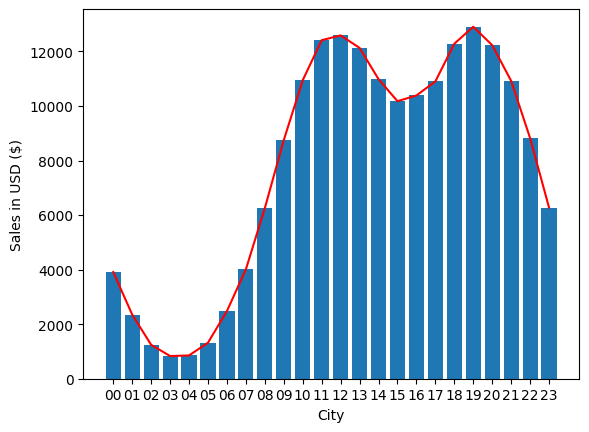

In [16]:
#plot data
numbers = range(0,24)
hours = [datetime.time(num).strftime("%H") for num in numbers]
print(hours)
plt.plot(hours, sales_per_hour,color="red")
plt.bar(hours, sales_per_hour)
#plt.xticks(hours,rotation='vertical',size=8) # modifica le proprietà delle label dell'asse x
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.show()

In [54]:
all_data.head(300)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,08
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,09
...,...,...,...,...,...,...,...,...,...,...
296,176838.0,Lightning Charging Cable,1.0,14.95,2019-04-05 18:44:00,"656 South St, New York City, NY 10001",04,14.95,New York City,18
297,176839.0,20in Monitor,1.0,109.99,2019-04-10 07:19:00,"625 Willow St, Boston, MA 02215",04,109.99,Boston,07
298,176840.0,USB-C Charging Cable,1.0,11.95,2019-04-02 10:08:00,"939 14th St, Austin, TX 73301",04,11.95,Austin,10
299,176841.0,AAA Batteries (4-pack),3.0,2.99,2019-04-26 22:50:00,"177 Highland St, San Francisco, CA 94016",04,8.97,San Francisco,22


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141275.0,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
1,141275.0,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
2,141290.0,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,08
3,141290.0,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,08
4,141365.0,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11
...,...,...,...,...,...,...,...,...,...,...
14644,319584.0,Wired Headphones,1.0,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland,00
14645,319596.0,iPhone,1.0,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City,08
14646,319596.0,Lightning Charging Cable,1.0,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City,08
14647,319631.0,34in Ultrawide Monitor,1.0,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin,22
